bfs(Breadth First Search)<br>
너비 우선 탐색, 가까운 노드부터 탐색하는 알고리즘<br>
queue와 유사한 자료구조 방식<br>
코딩테스트에서는 DFS보다는 BFS 구현이 조금 더 빠르게 동작

bfs 동작 방식<br>
1. 탐색 시작 노드를 큐에 삽입하고 방문 처리<br>
2. 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리<br>
3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복

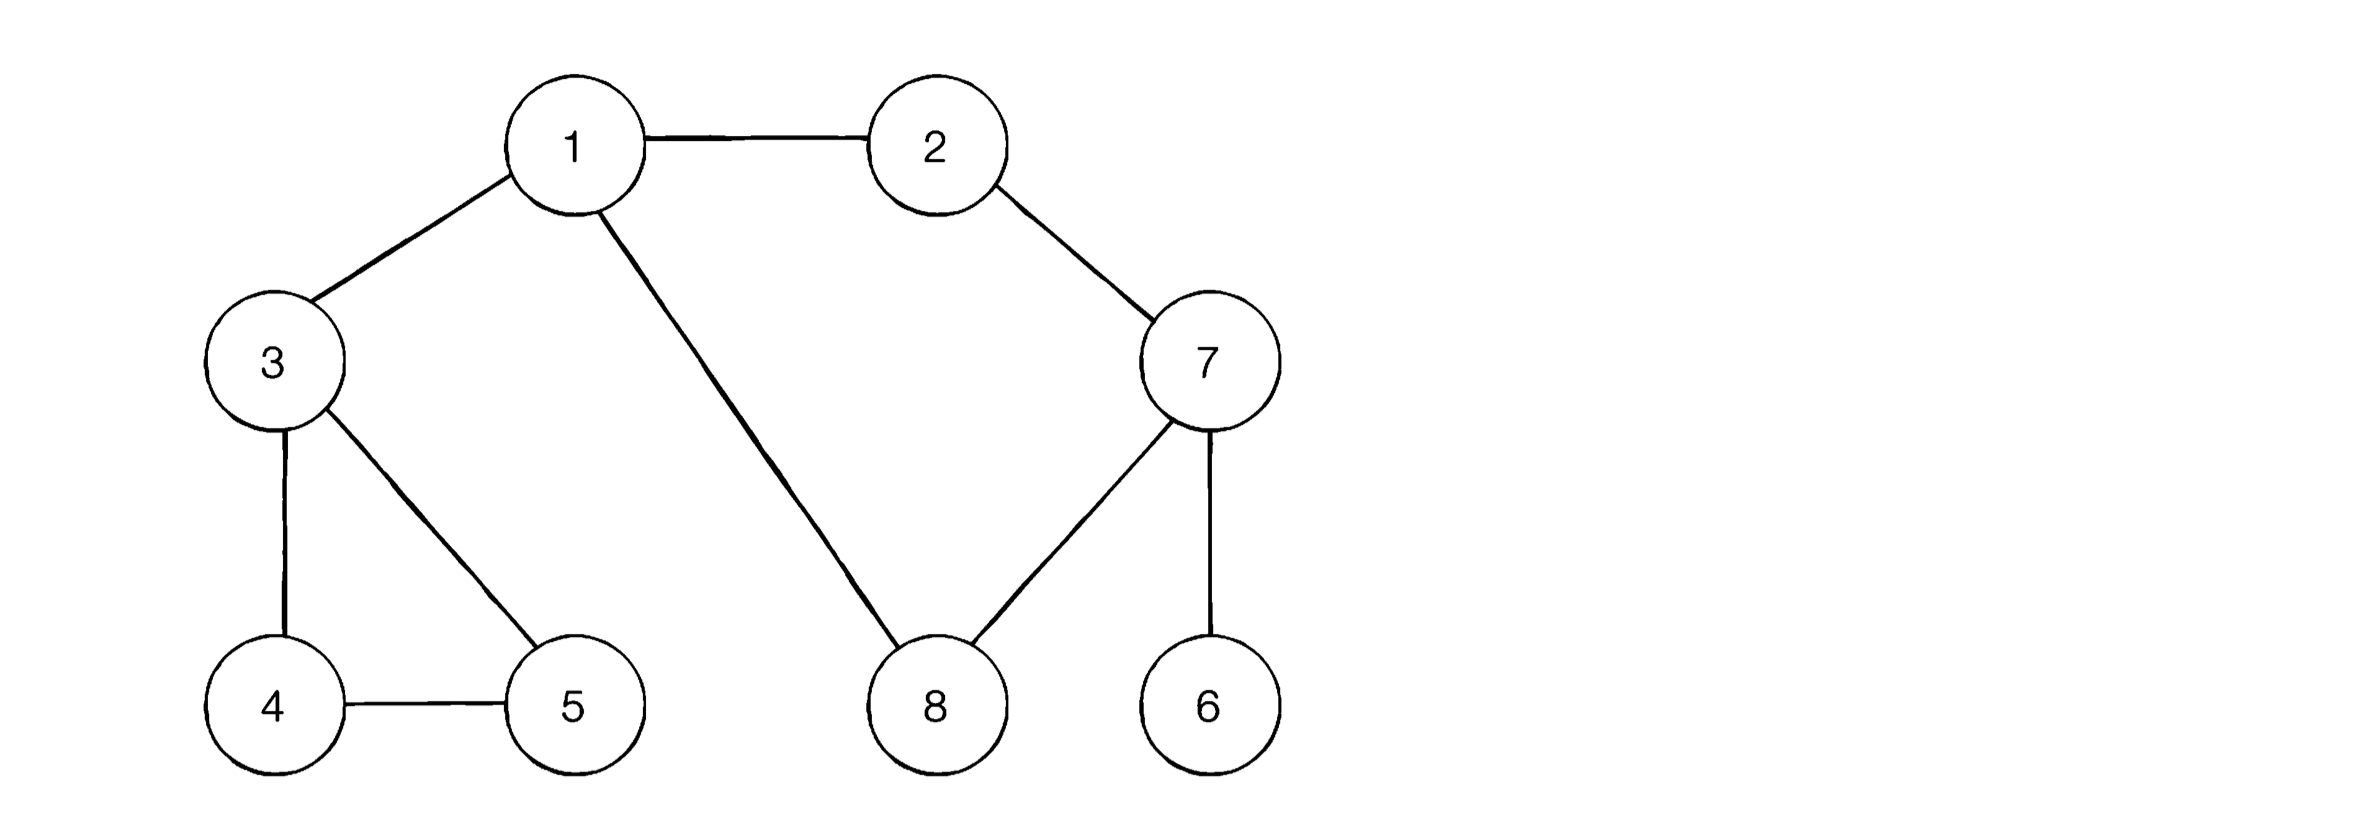

In [2]:
from collections import deque

In [3]:
def bfs(graph, start, visited):
    queue = deque([start])
    
    visited[start] = True
    
    while True:
        v = queue.popleft()
        print(v, end=' ')
        
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

In [4]:
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

visited = [False] * 9

In [5]:
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

IndexError: pop from an empty deque

# 

# *예제*

## 음료수 얼려먹기
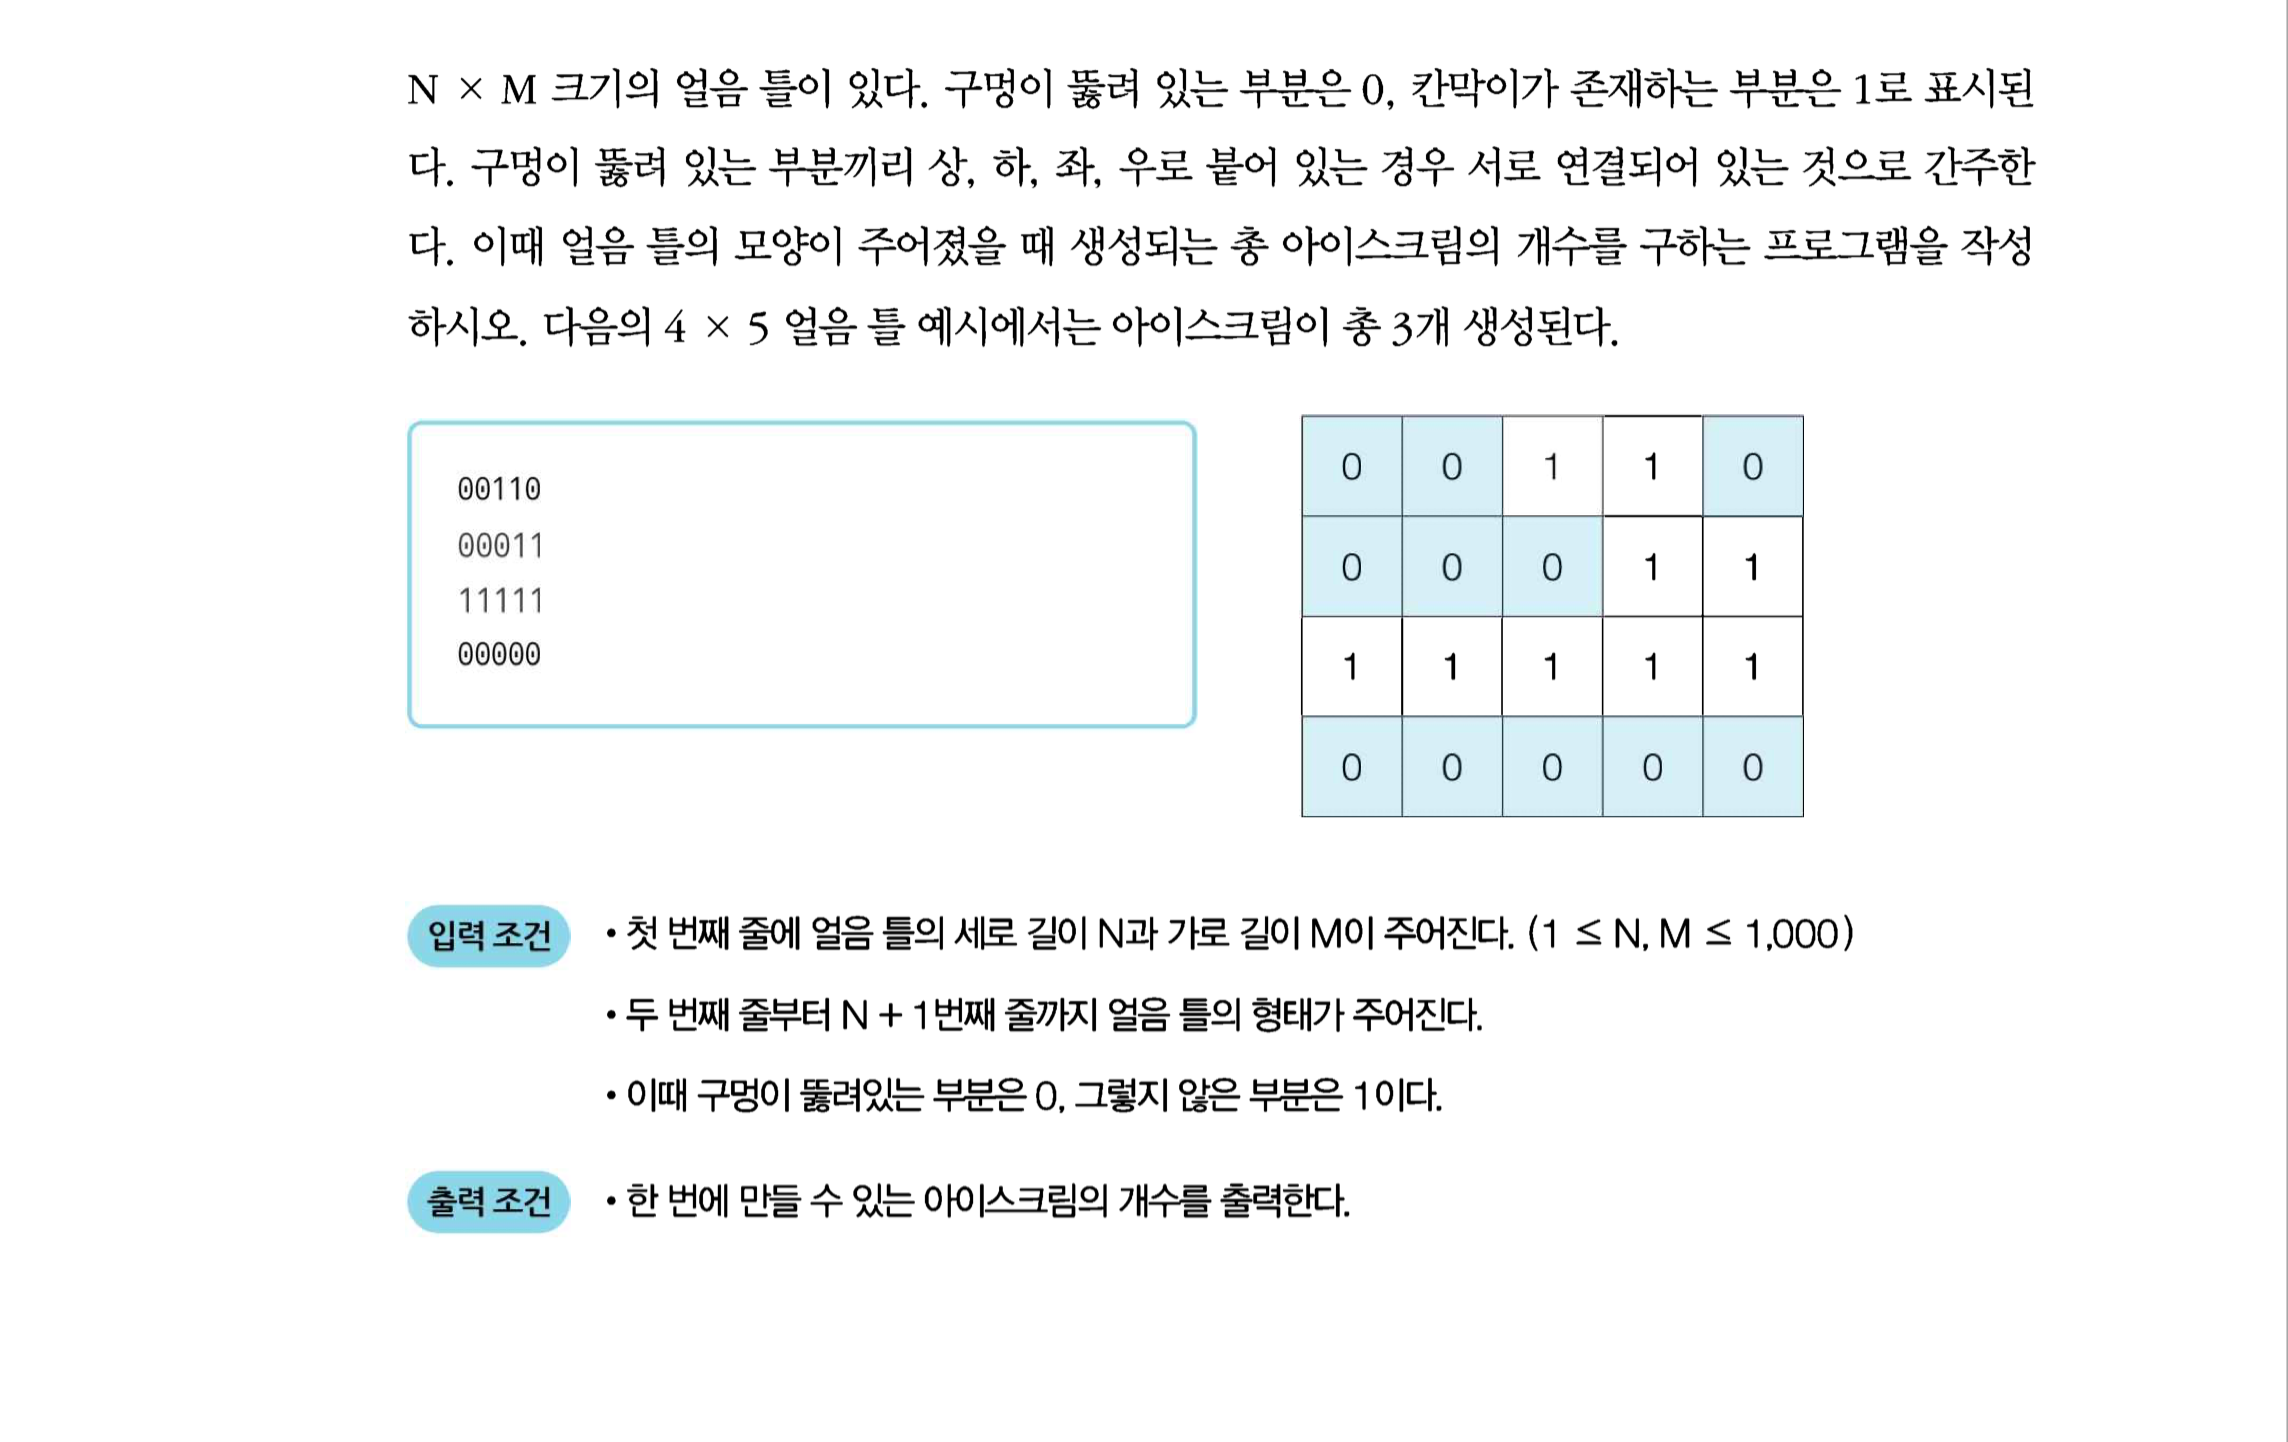

In [1]:
n, m = 4, 5

graph = [
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
]

In [2]:
from collections import deque

def bfs(row, col):
    """col, row : 시작 지점에 대한 행 열"""

    # 입력된 값이 0일 때, 즉 얼음을 만들 수 있는 공간일 때
    if graph[row][col] == 0:
        # 큐 생성
        queue = deque()
        queue.append((row, col))
        
        # 방문 지점 표시
        graph[row][col] = 1

        # queue가 없어질 때까지 반복 후 없어지면 값을 1 추가하고 break
        while True:
            if not queue:
                return 1
            row, col = queue.popleft()
            # 상하좌우로 이동하며 이동한 장소가 0일 떄 큐에 추가
            for dx, dy in [[0, -1], [0, 1], [-1, 0], [1, 0]]:
                # 이동한 장소가 주어진 범위 이내인 지 확인
                if 0 <= row+dy <= n-1 and 0 <= col+dx <= m-1:  
                    if graph[row+dy][col+dx] == 0:
                        queue.append([row+dy, col+dx])
                        # 방문 지점 표시
                        graph[row+dy][col+dx] = 1
    return 0

In [3]:
result = 0
for row in range(len(graph)):
    for col in range(len(graph[row])):
        result += bfs(row, col)

print(f"result : {result}")

queue : deque([(0, 0)])
row, col : 0, 0
row, col : 1, 0
row, col : 0, 1
row, col : 1, 1
row, col : 1, 2
queue : deque([(0, 4)])
row, col : 0, 4
queue : deque([(3, 0)])
row, col : 3, 0
row, col : 3, 1
row, col : 3, 2
row, col : 3, 3
row, col : 3, 4
result : 3


# 

## 미로 탈출
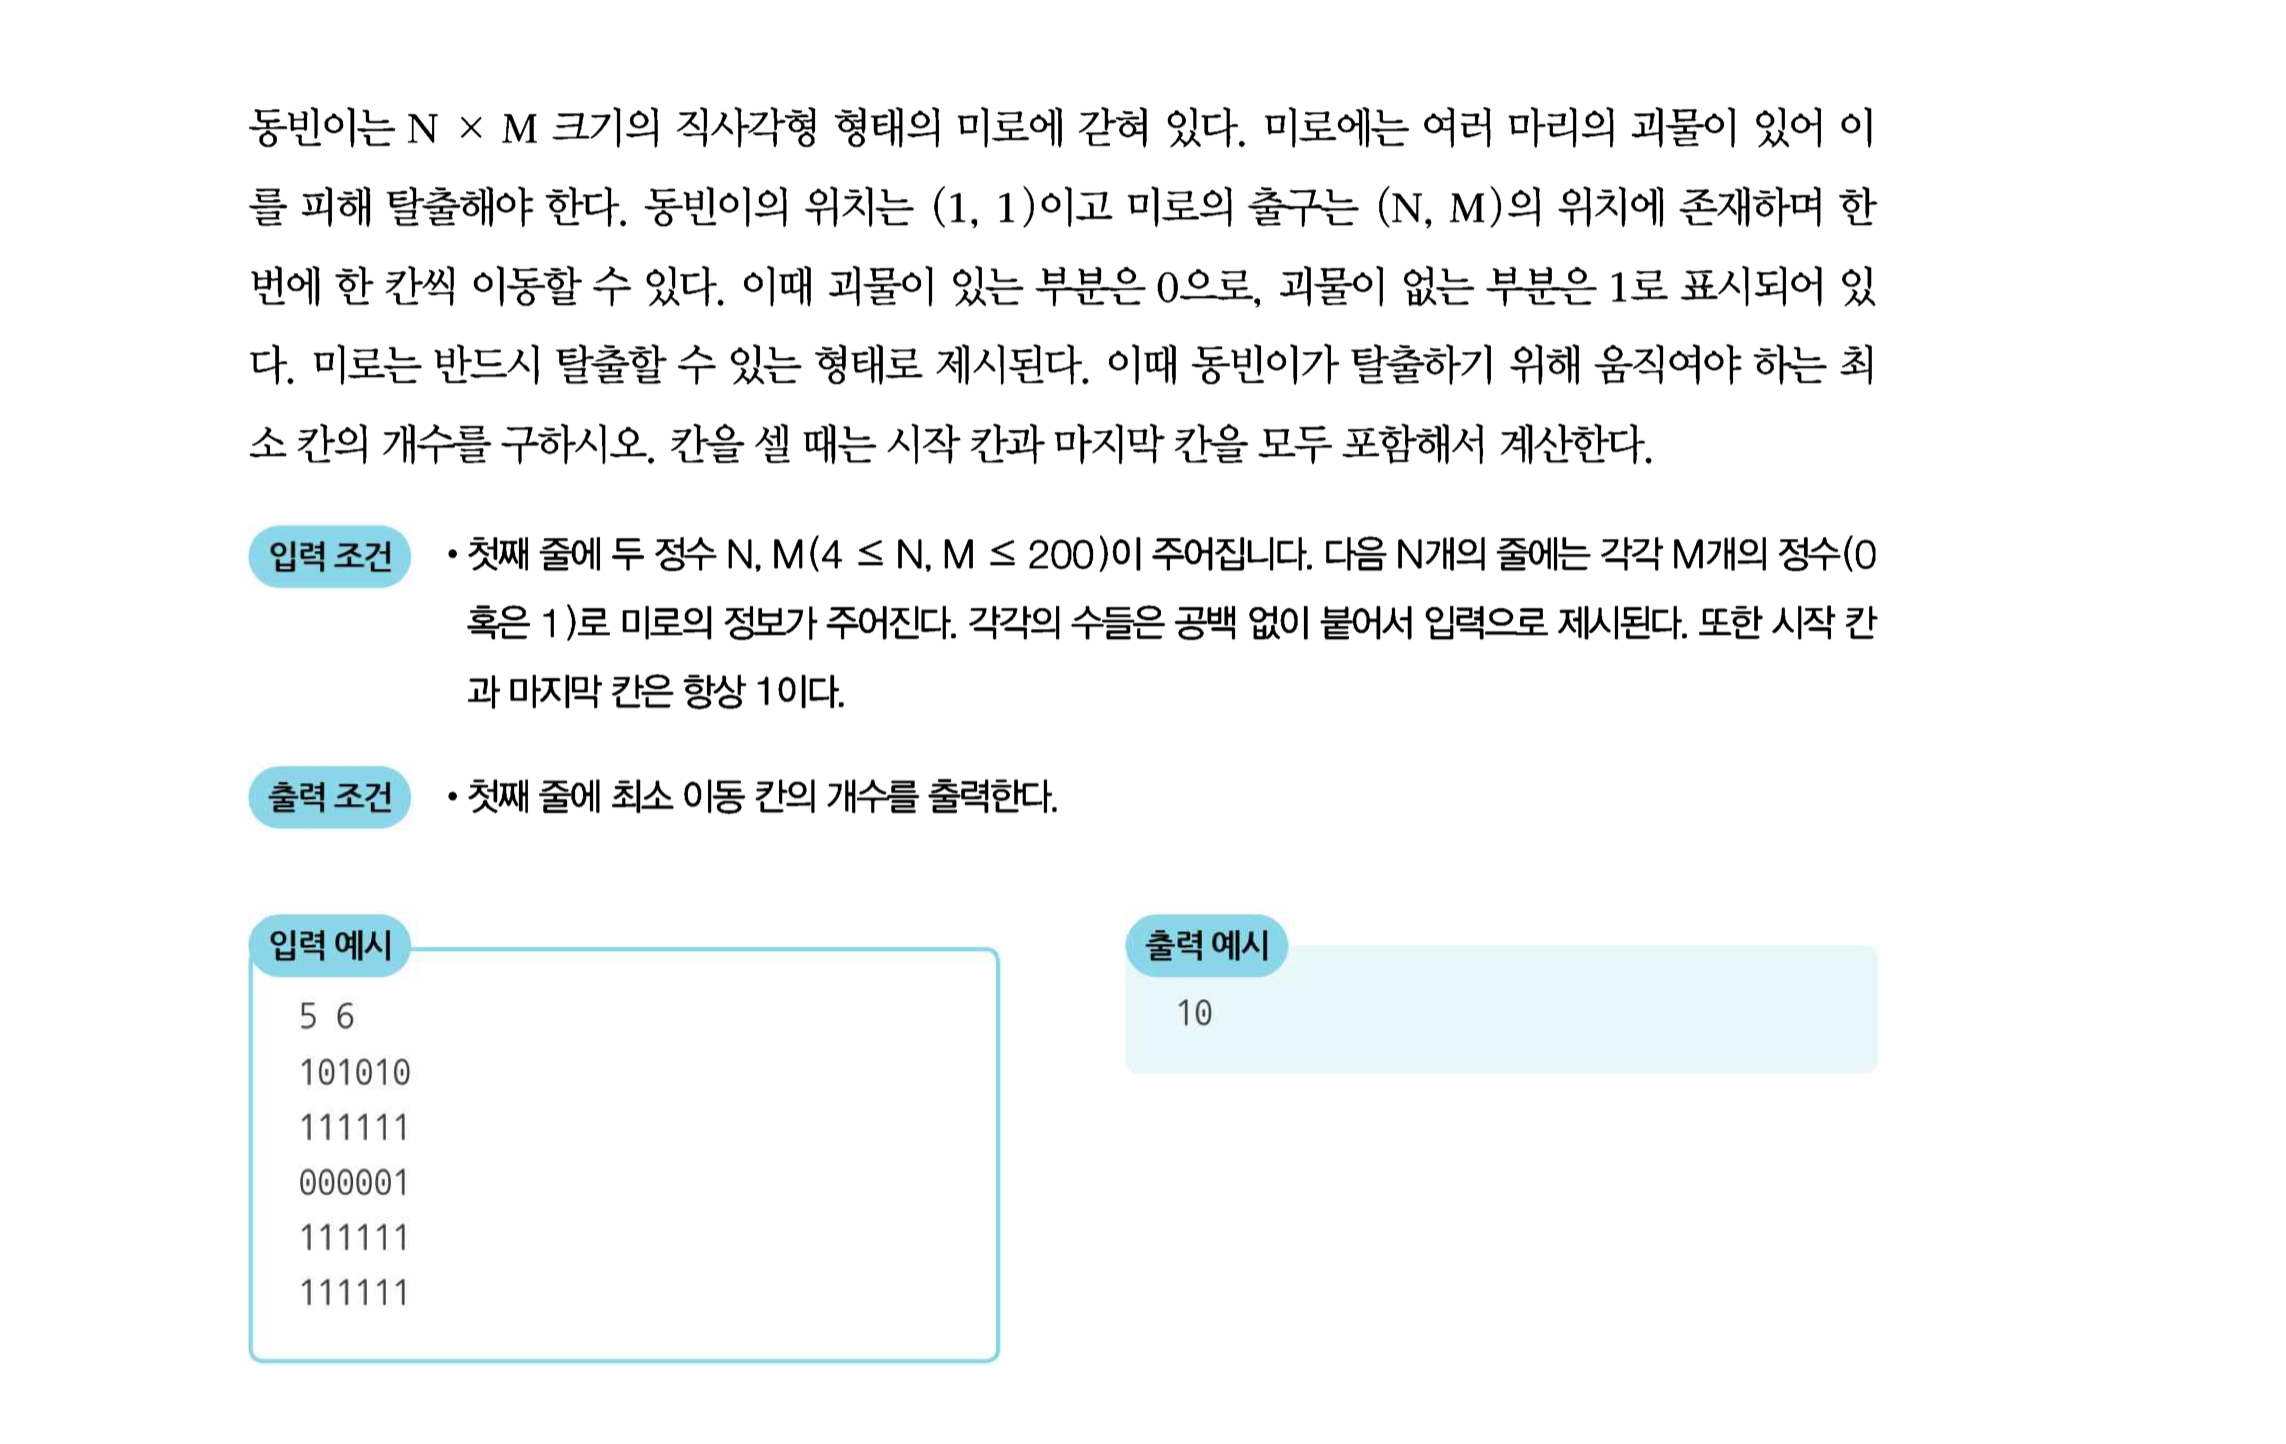
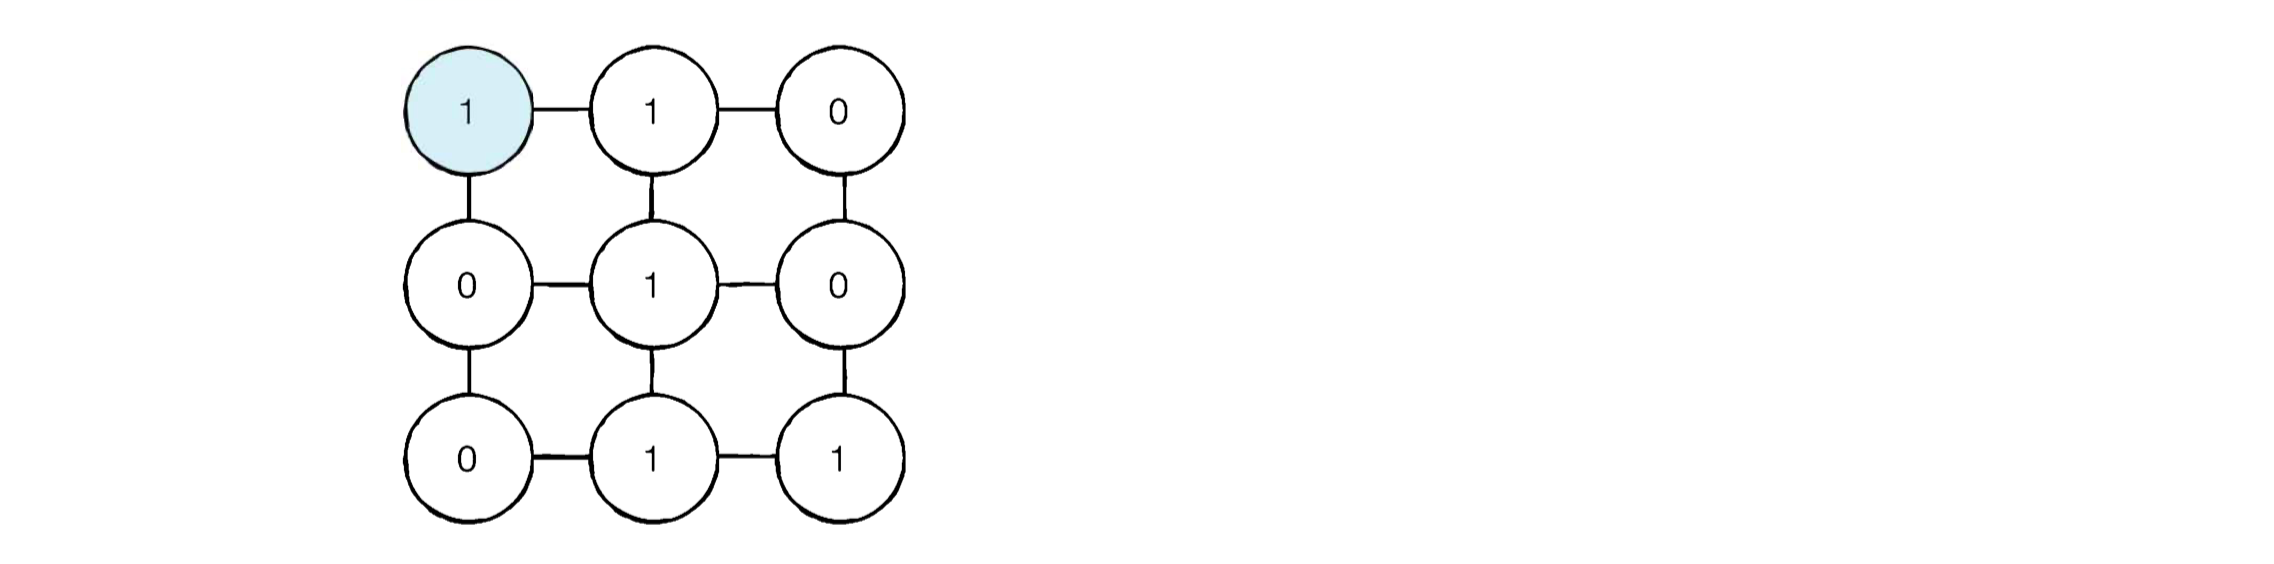

In [1]:
n = 5
m = 6

graph = [
    [1, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1],
]

In [2]:
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

In [3]:
from collections import deque

In [4]:
def bfs(x, y):
    queue = deque()
    queue.append((x, y))

    # 큐가 없을 때까지 반복
    while queue:
        x, y = queue.popleft()
        
        # 현재 위치에서 상하좌우 위치 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            # 벽인 경우 무시
            if graph[nx][ny] == 0:
                continue
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 저장
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n - 1][m - 1]

In [5]:
print(bfs(0, 0))

10
